<a href="https://colab.research.google.com/github/devanshujain47/new/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

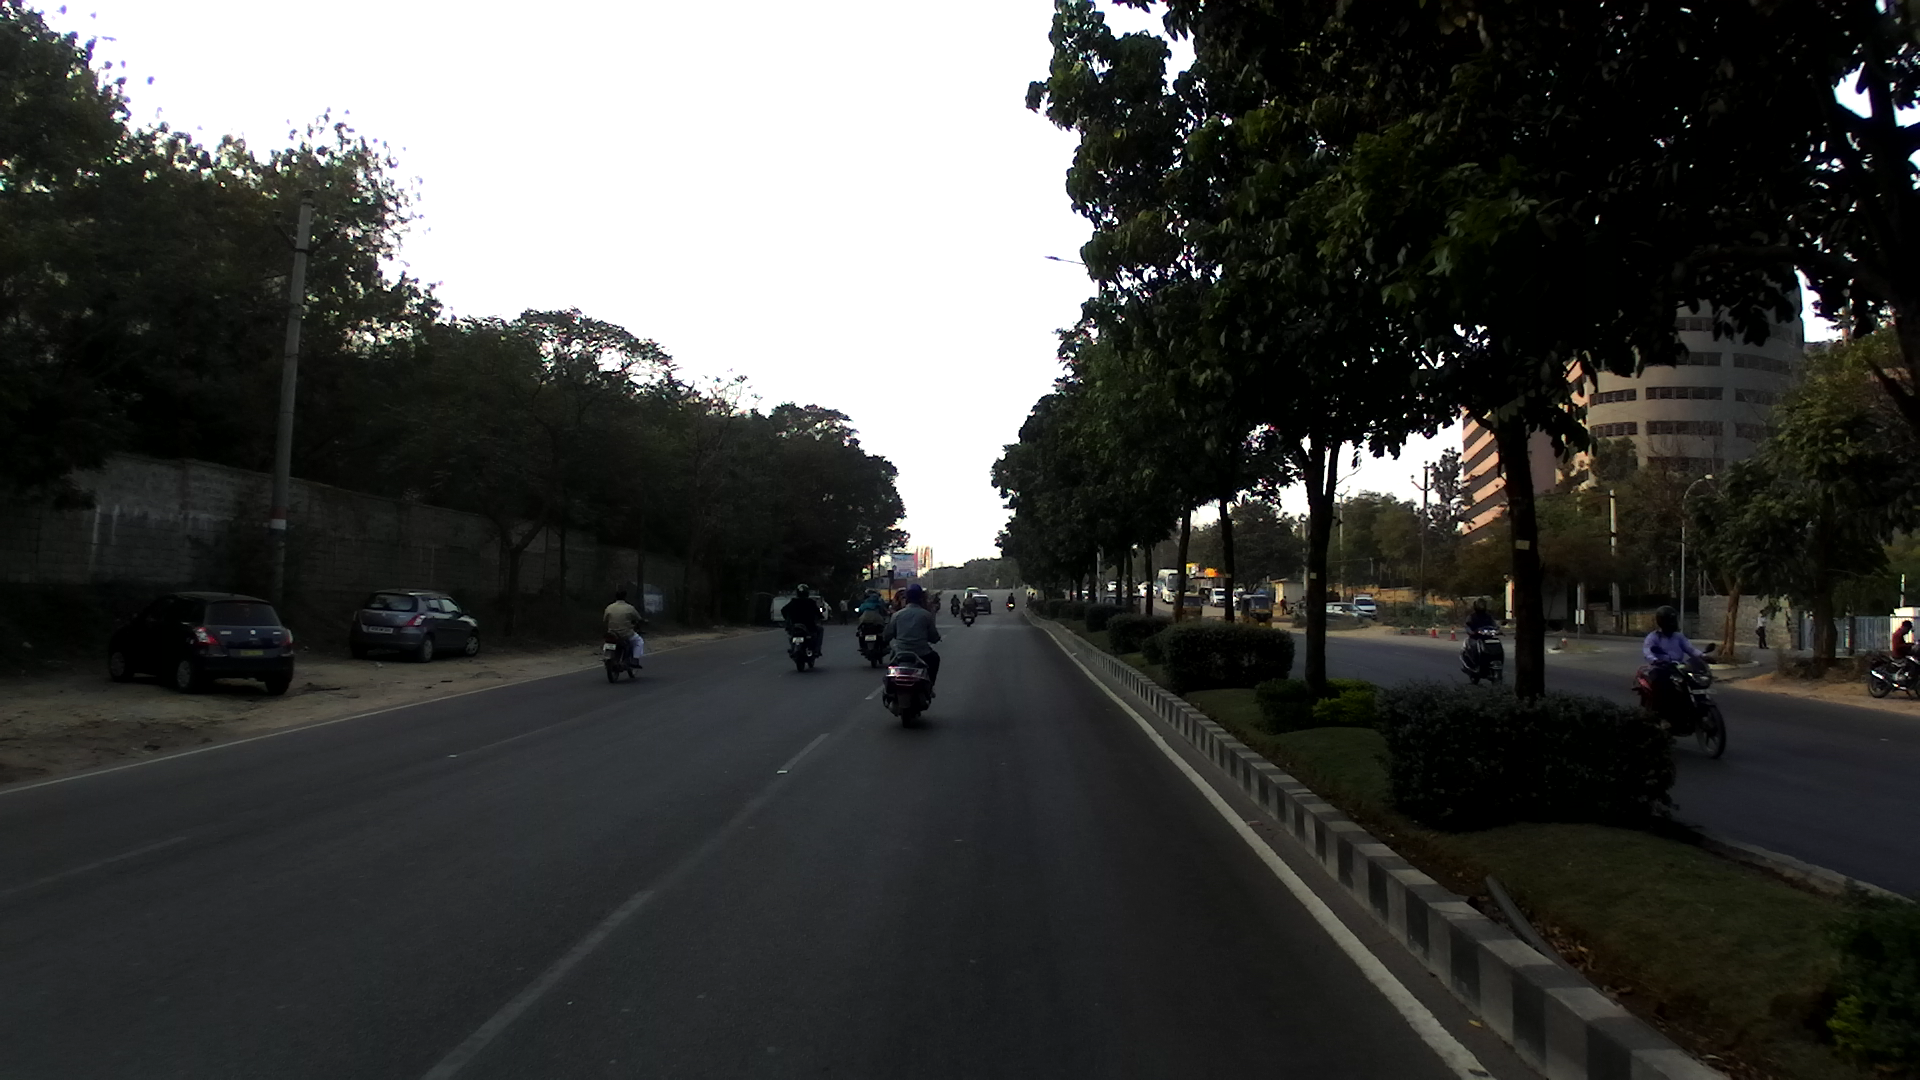

In [ ]:
## IMAGE DISPLAY
 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution


image = cv2.imread('2.png')
cv2_imshow(image)


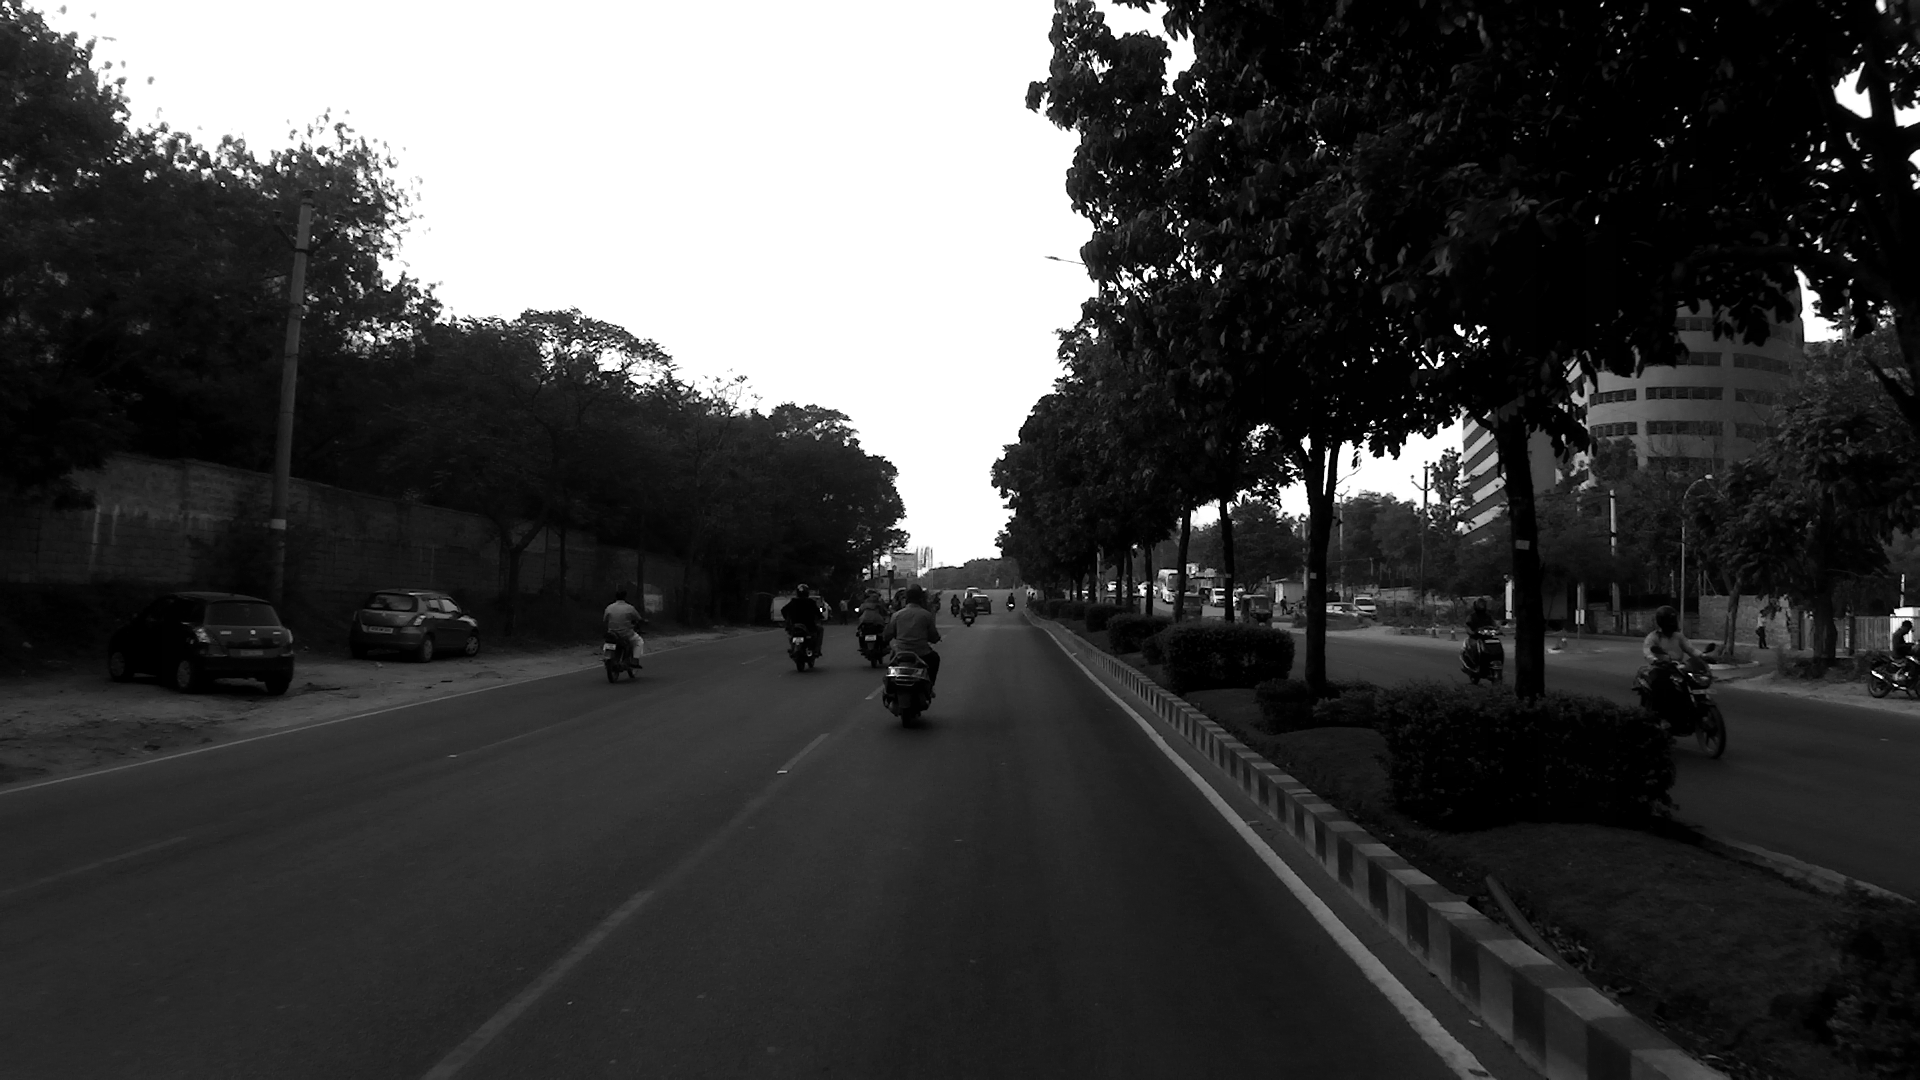

In [ ]:
## GRAYSCALE

lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

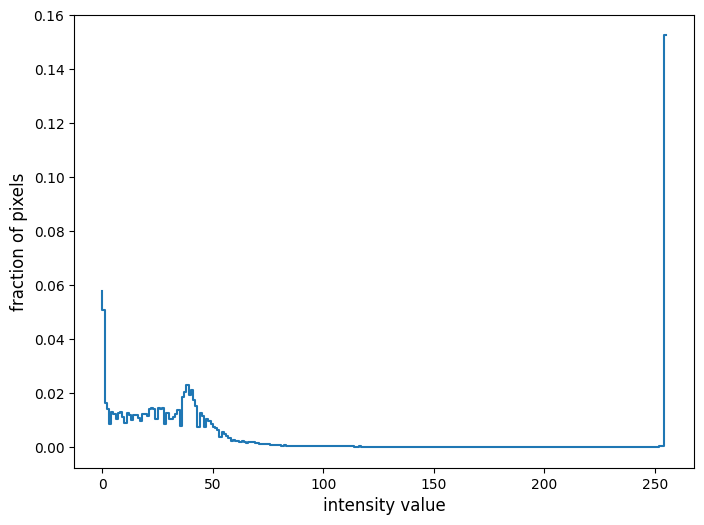

In [ ]:
freq, bins = histogram(gray)
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='white')
freq, bins = histogram(gray)
plt.step(bins, freq/freq.sum())
plt.xlabel('intensity value', fontsize = 12)
plt.ylabel('fraction of pixels', fontsize = 12);

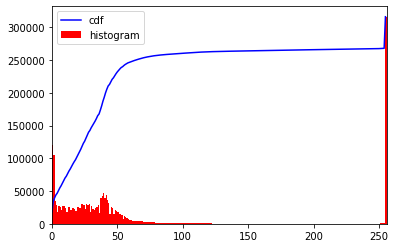

In [ ]:
hist,bins = np.histogram(gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

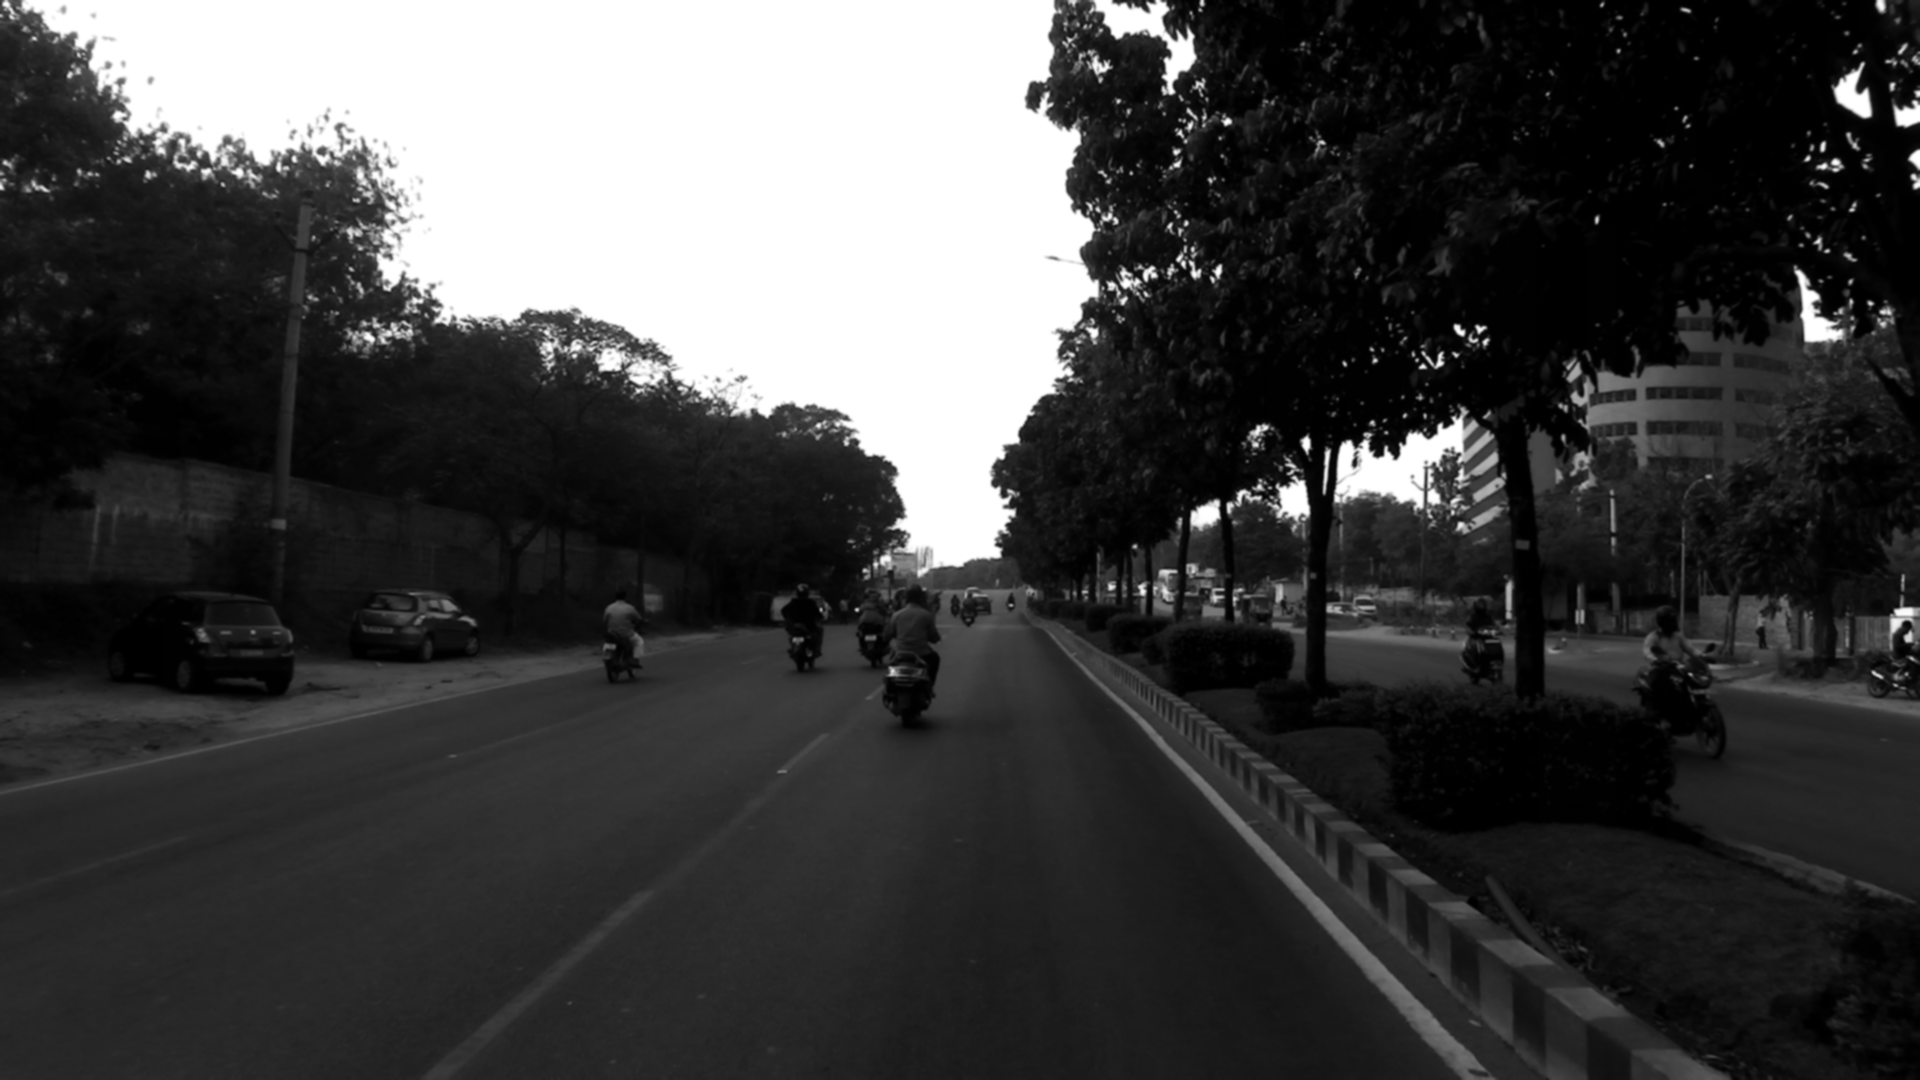

In [ ]:
## NOISE REDUCTION

blur = cv2.GaussianBlur(gray, (5,5,), 0)
cv2_imshow(blur)

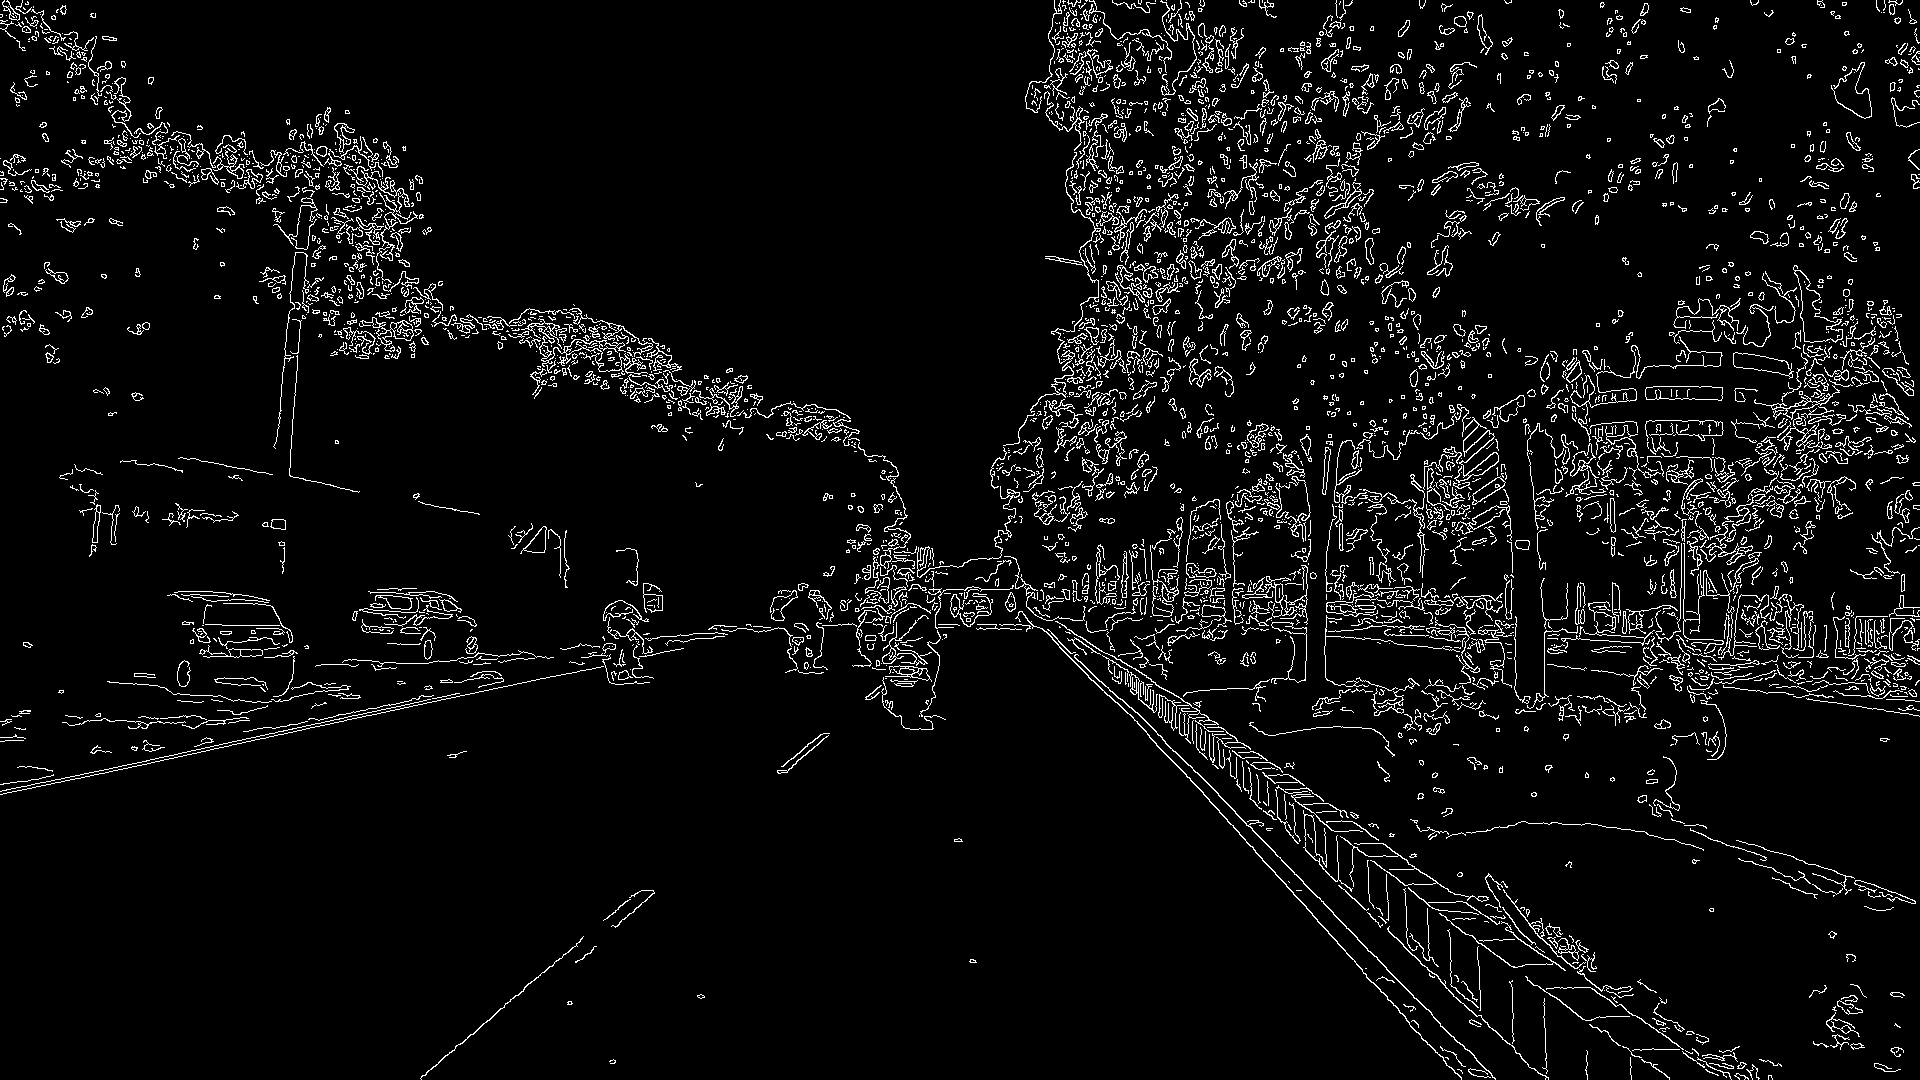

In [ ]:
## CANNY EDGE DETECTION

canny = cv2.Canny(blur, 20, 50)
cv2_imshow(canny)

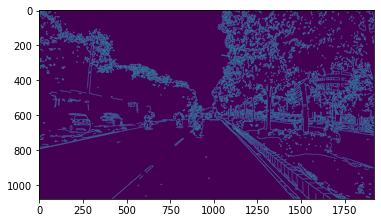

In [ ]:
## Axes cordinates 

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

def canny(image):
  gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5,), 0)
  canny = cv2.Canny(blur, 20, 50)
  return canny

image = cv2.imread('2.png')
lane_image = np.copy(image)
canny = canny(lane_image )
plt.imshow(canny)


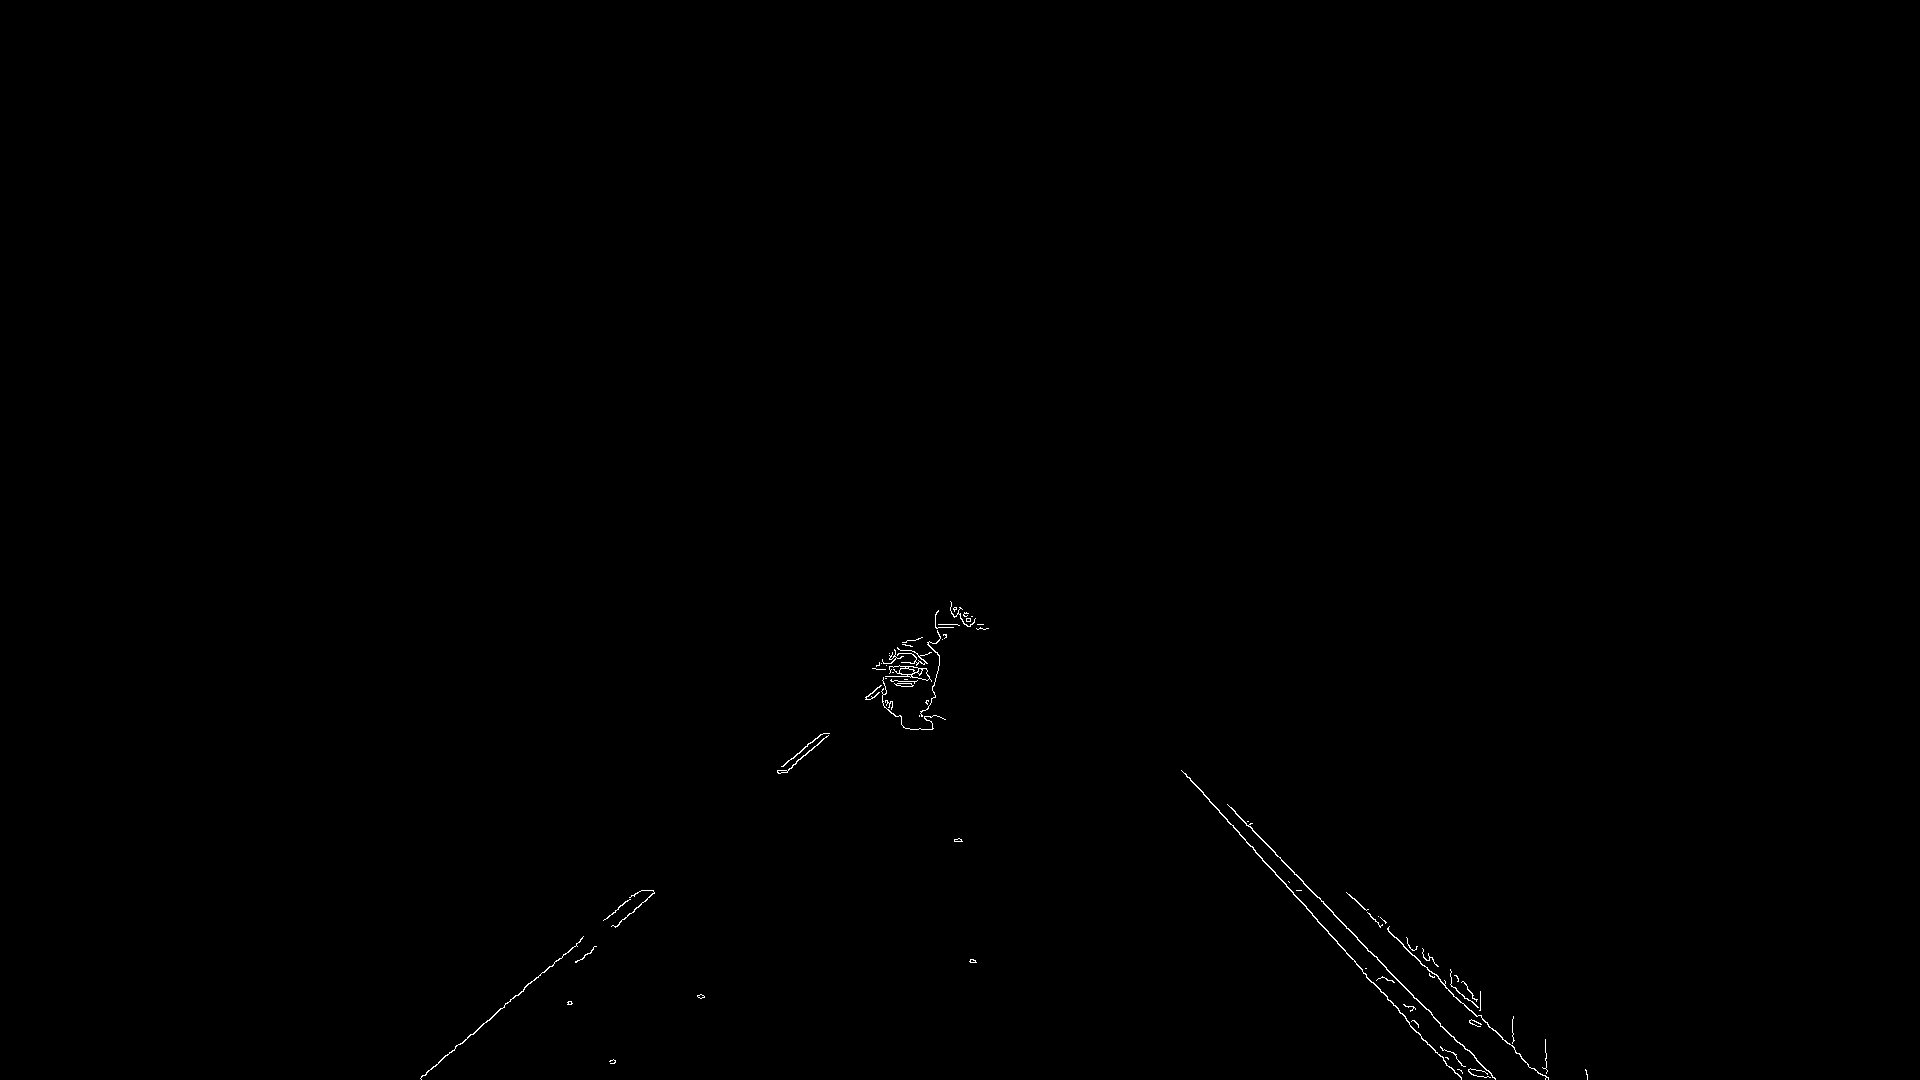

In [ ]:
## region of interest and Mask

def canny(image):
  gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5,), 0)
  canny = cv2.Canny(blur, 20, 50)
  return canny

def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([(400, height ), (1600, height), (950, 600)])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, np.int32([polygons]),255)
  masked_image = cv2.bitwise_and(image, mask) 
  return masked_image

image = cv2.imread('2.png')
lane_image = np.copy(image)
canny = canny(lane_image )
cropped_image = region_of_interest(canny)
cv2_imshow(cropped_image)



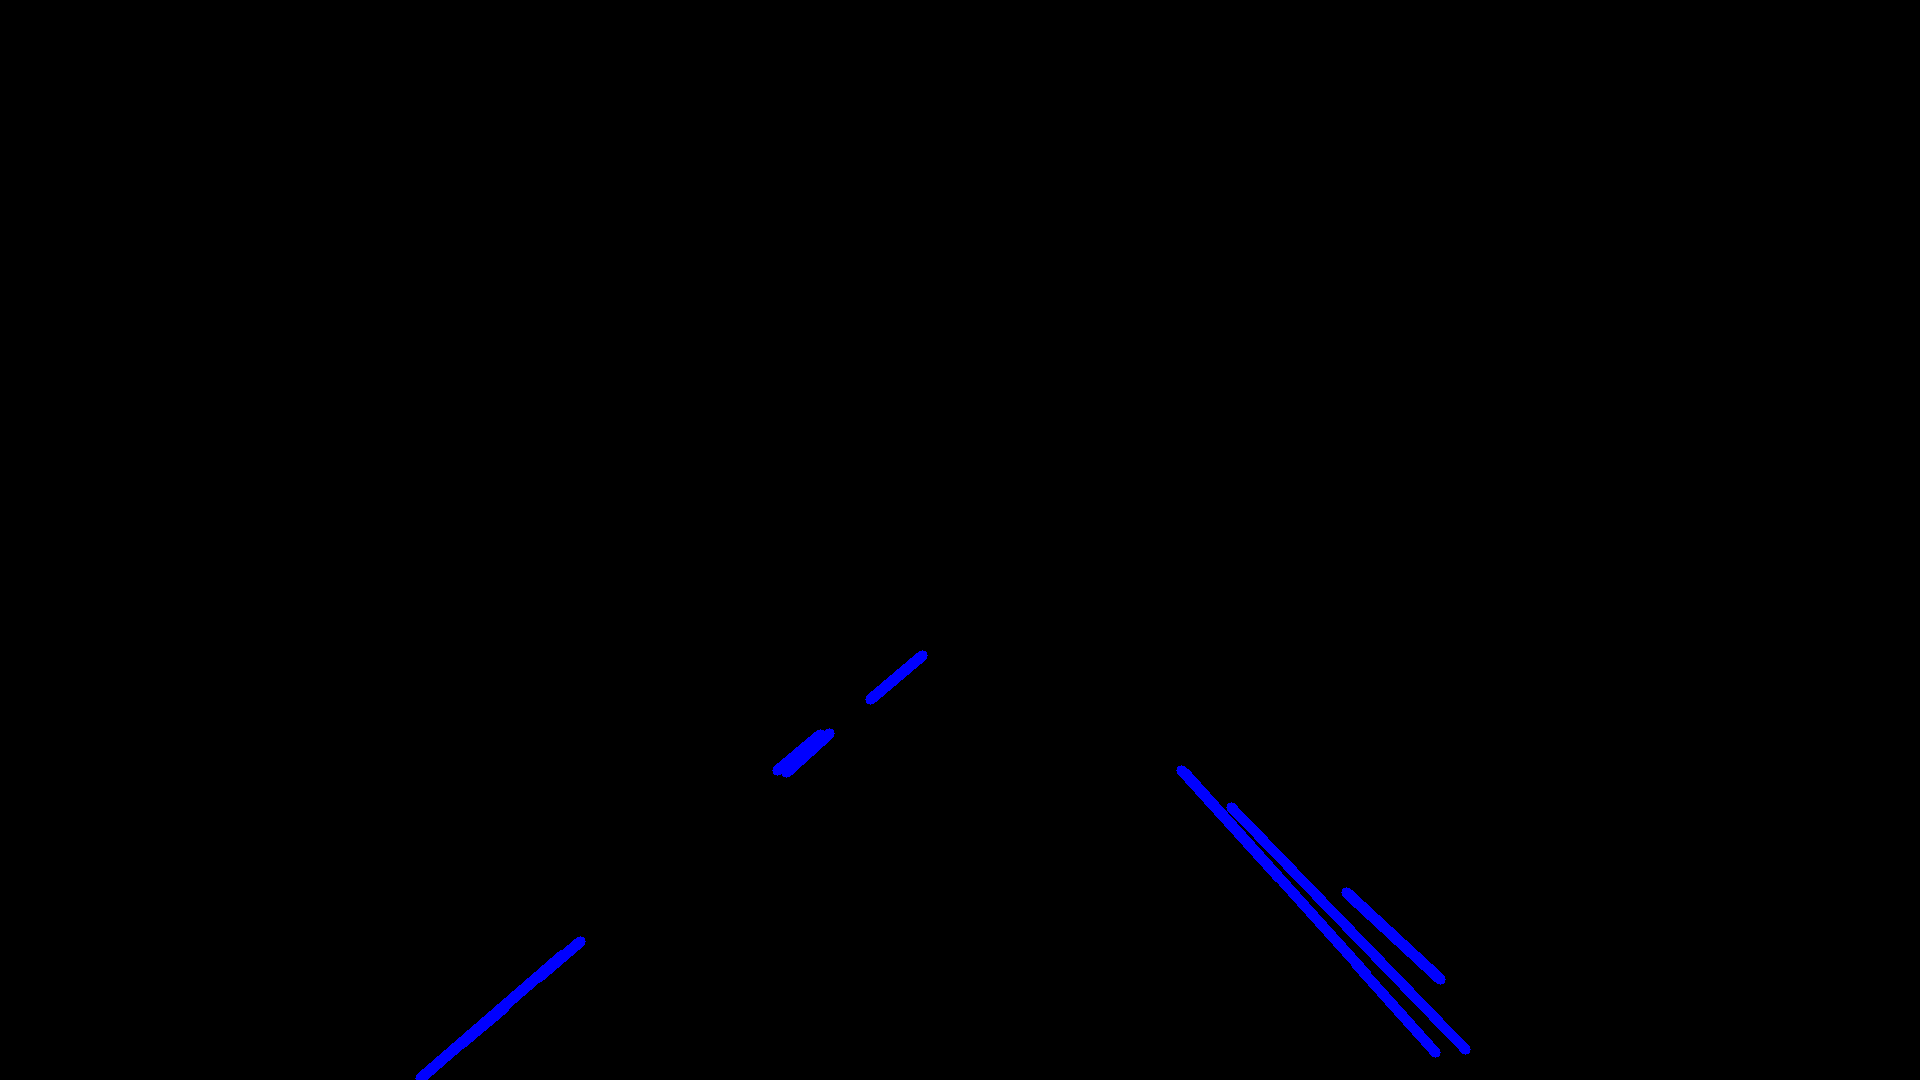

In [ ]:
## Find lane lines using Hough transform


def canny(image):
  gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5,), 0)
  canny = cv2.Canny(blur, 20, 50)
  return canny

def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2= line.reshape(4)
      cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
  return line_image


def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([(400, height ), (1600, height), (950, 600)])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, np.int32([polygons]),255)
  masked_image = cv2.bitwise_and(image, mask) 
  return masked_image

image = cv2.imread('2.png')
lane_image = np.copy(image)
canny = canny(lane_image )
cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image ,2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 6)
line_image = display_lines(lane_image, lines)
cv2_imshow(line_image)








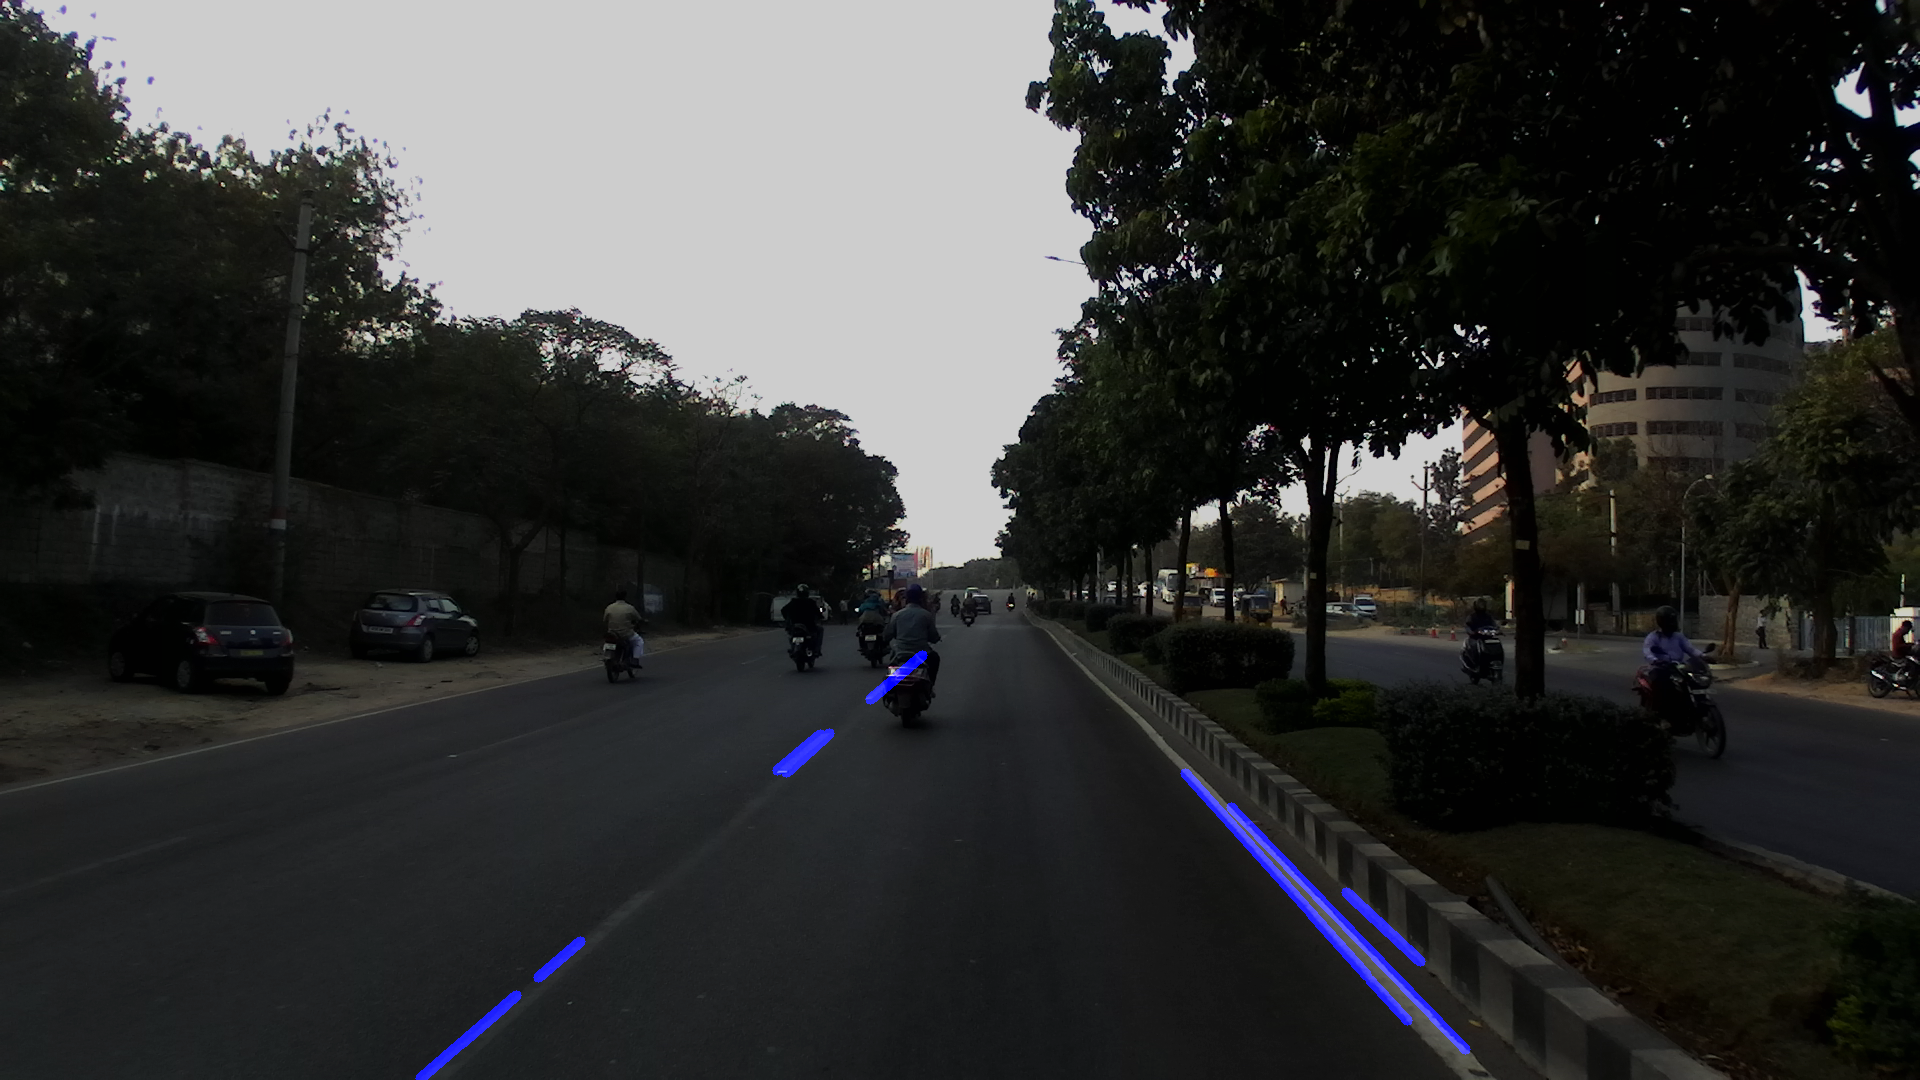

In [ ]:
# blend image back to original image

def make_coordinates(image, line_parameters):
  slope, intercept = line_parameters
  y1 = image.shape[0]
  y2 = int(y1*(3/5))
  x1 = int((y1 - intercept)/slope)
  x2 = int((y2 - intercept)/slope)
  return np.array([x1, y1, x2, y2])
  
def average_slope_intercept(image, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1,y1, x2, y2 =line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1)
    slope = parameters[0]
    intercept = parameters[1] 
    if slope < 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope, intercept))
  left_fit_average = np.average(left_fit, axis = 0)
  right_fit_average = np.average(right_fit, axis = 0)
  left_line = make_coordinates(image, left_fit_average)
  right_line = make_coordinates(image, right_fit_average)

def canny(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5,), 0)
  canny = cv2.Canny(blur, 20, 50)
  return canny

def display_lines(image, lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2= line.reshape(4)
      cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
  return line_image


def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([(400, height ), (1600, height), (950, 600)])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, np.int32([polygons]),255)
  masked_image = cv2.bitwise_and(image, mask) 
  return masked_image

image = cv2.imread('2.png')
lane_image = np.copy(image)
canny_image = canny(lane_image )
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image ,2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5 )
averaged_lines = average_slope_intercept(lane_image,lines )
line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)
cv2_imshow(combo_image)






